In [1]:
from deap import base, creator, tools, algorithms
import random

# Problem Constants
GRID_SIZE = 10
NUM_POINTS = 10
RADAR_RANGE = 3.0
POPULATION_SIZE = 50
NUM_GENERATIONS = 40

# Generate random critical points
random.seed(42)
critical_points = [(random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)) for _ in range(NUM_POINTS)]

# Fitness function
def evaluate(individual):
    coverage_set = set()
    for i in range(0, len(individual), 2):
        x, y = individual[i], individual[i+1]
        # Check coverage for each critical point
        for px, py in critical_points:
            if (x - px) ** 2 + (y - py) ** 2 <= RADAR_RANGE ** 2:
                coverage_set.add((px, py))
    # Minimize number of radars and maximize coverage
    return (len(individual) // 2 - len(coverage_set),)

# Setup DEAP framework for genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, GRID_SIZE)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2*NUM_POINTS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create initial population and run the genetic algorithm
population = toolbox.population(n=POPULATION_SIZE)
results = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=NUM_GENERATIONS, verbose=True)

# Display results
best_individual = tools.selBest(population, 1)[0]
print("Best Individual (Radar Positions):", best_individual)
print("Fitness (Uncovered Points Penalty):", best_individual.fitness.values[0])


gen	nevals
0  	50    
1  	32    
2  	23    
3  	26    
4  	34    
5  	33    
6  	32    
7  	31    
8  	26    
9  	32    
10 	31    
11 	33    
12 	33    
13 	27    
14 	34    
15 	31    
16 	27    
17 	30    
18 	30    
19 	22    
20 	32    
21 	27    
22 	29    
23 	34    
24 	29    
25 	30    
26 	27    
27 	28    
28 	23    
29 	32    
30 	35    
31 	36    
32 	29    
33 	30    
34 	31    
35 	36    
36 	31    
37 	20    
38 	38    
39 	32    
40 	30    
Best Individual (Radar Positions): [8.819604115976714, 1.2100419586826572, 2.2469733703155734, 1.6284765575764557, 6.510702893054438, 2.7234821231481634, 10.35251042578295, -1.1175983429590854, 5.4559028920552235, 4.885778468487874, 5.82509566489794, 1.4809378556748265, -0.13727002800612165, 1.6479244487576818, 8.9898148874259, 8.90067112319425, 2.2159640047253015, 8.14134016075229, 5.7104309332528445, 4.726710263117941]
Fitness (Uncovered Points Penalty): 0.0


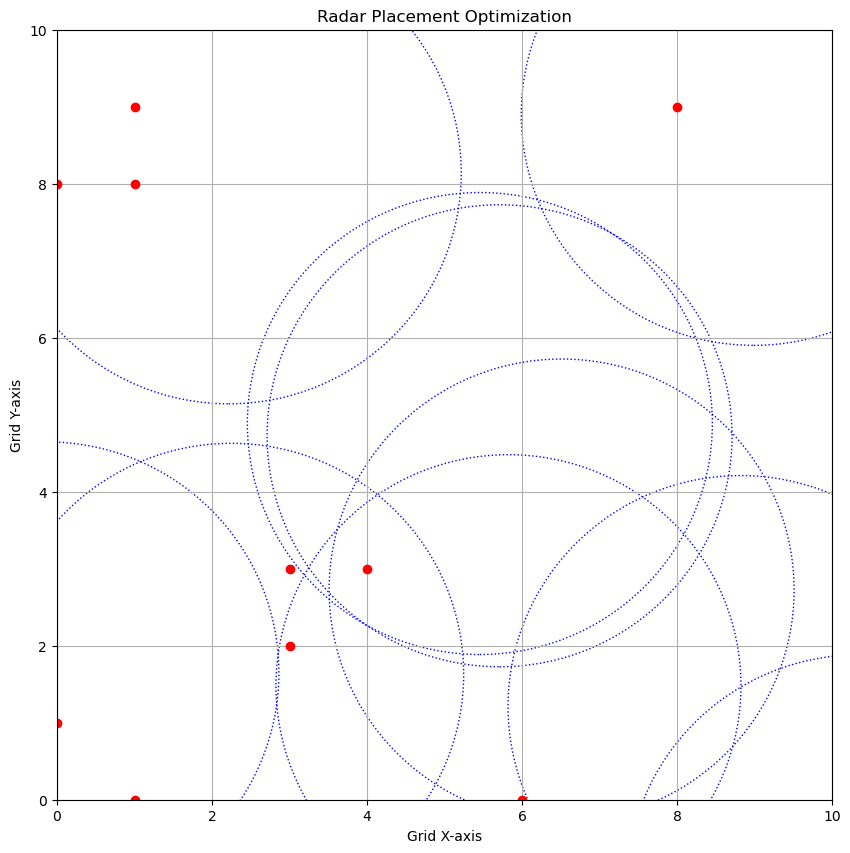

In [2]:
import matplotlib.pyplot as plt

# Grid and Radar Information
grid_size = 10
radar_range = 3.0
radar_positions = [
    (8.819604115976714, 1.2100419586826572), (2.2469733703155734, 1.6284765575764557),
    (6.510702893054438, 2.7234821231481634), (10.35251042578295, -1.1175983429590854),
    (5.4559028920552235, 4.885778468487874), (5.82509566489794, 1.4809378556748265),
    (-0.13727002800612165, 1.6479244487576818), (8.9898148874259, 8.90067112319425),
    (2.2159640047253015, 8.14134016075229), (5.7104309332528445, 4.726710263117941)
]

# Generate random critical points (for visualization)
random.seed(42)
critical_points = [(random.randint(0, grid_size-1), random.randint(0, grid_size-1)) for _ in range(10)]

# Plotting
plt.figure(figsize=(10, 10))
for x, y in critical_points:
    plt.plot(x, y, 'ro')  # Red dots for critical points
for x, y in radar_positions:
    circle = plt.Circle((x, y), radar_range, color='b', fill=False, linestyle='dotted')
    plt.gca().add_artist(circle)
plt.xlim(0, grid_size)
plt.ylim(0, grid_size)
plt.grid(True)
plt.title('Radar Placement Optimization')
plt.xlabel('Grid X-axis')
plt.ylabel('Grid Y-axis')
plt.show()
